In [3]:
import pandas as pd
df = pd.read_csv('./TSLA.csv')
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,250.000000,250.000000,250.000000,250.000000,250.000000,2.500000e+02
mean,208.730880,213.228640,204.199160,208.919440,208.919440,1.389493e+08
std,44.902093,45.242957,44.581597,44.941652,44.941652,3.756574e+07
min,103.000000,111.750000,101.809998,108.099998,108.099998,6.512520e+07
25%,178.057503,183.537498,175.505001,180.132504,180.132504,1.118176e+08
50%,205.600006,209.810005,198.944999,206.529999,206.529999,1.307960e+08
75%,249.542499,255.235000,244.472496,250.217502,250.217502,1.610446e+08
max,296.040009,299.290009,289.519989,293.339996,293.339996,3.065906e+08


In [6]:
price_df = df.loc[:,['Date', 'Adj Close']].copy()
price_df.head()
#price_df.set_index(['Date'], inplace=True)
#price_df.head()

,Date,Adj Close
0,2022-11-28,182.919998
1,2022-11-29,180.830002
2,2022-11-30,194.699997
3,2022-12-01,194.699997
4,2022-12-02,194.860001


In [11]:
price_df['center'] = price_df['Adj Close'].rolling(window = 20).mean()
price_df['ub'] = price_df['center']+ 2*price_df['Adj Close'].rolling(window = 20).std()
price_df['lb'] = price_df['center']- 2*price_df['Adj Close'].rolling(window = 20).std()

price_df.iloc[18:25]

,Date,Adj Close,center,ub,lb
18,2022-12-22,125.349998,NaN,NaN,NaN
19,2022-12-23,123.150002,165.201,209.944438,120.457562
20,2022-12-27,109.099998,161.510,211.919424,111.100577
21,2022-12-28,112.709999,158.104,212.095097,104.112903
22,2022-12-29,121.820000,154.460,207.886034,101.033966
23,2022-12-30,123.180000,150.884,202.513339,99.254662
24,2023-01-03,108.099998,146.546,197.187700,95.904301


In [15]:
def bollingerBand(price_df, n, sigma):
    bb = price_df.copy()
    bb['center'] = price_df['Adj Close'].rolling(window = n).mean()
    bb['ub'] = price_df['center']+ sigma*price_df['Adj Close'].rolling(window = n).std()
    bb['lb'] = price_df['center']- sigma*price_df['Adj Close'].rolling(window = n).std()
    return bb
price_df.set_index(['Date'], inplace=True)
bollinger = bollingerBand(price_df, 20, 2) 
sample = bollinger.loc['2023-01-03':] # I set the Date column as an index, so I can use .loc here
sample.head(10)

,Adj Close,center,ub,lb
Date,,,,
2023-01-03,108.099998,146.546000,197.187700,95.904301
2023-01-04,113.639999,143.105500,192.817789,93.393212
2023-01-05,110.339996,139.631500,188.239448,91.023551
2023-01-06,113.059998,136.582500,183.730983,89.434017
2023-01-09,119.769997,133.899000,178.240530,89.557470
2023-01-10,118.849998,130.888999,170.214820,91.563178
2023-01-11,123.220001,128.658999,164.026029,93.291970
2023-01-12,123.559998,126.789499,158.759280,94.819718
2023-01-13,122.400002,125.069499,153.775952,96.363046


In [17]:
def creatingBook(sample):
    book = sample[['Adj Close']].copy()
    book['trade'] = ''
    return (book)

In [18]:
def tradings(sample, book):
    for i in sample.index:
        if sample.loc[i, 'Adj Close'] > sample.loc[i, 'ub']:
            book.loc[i, 'trade'] = ''
        elif sample.loc[i, 'lb'] > sample.loc[i, 'Adj Close']:
            if book.shift(1).loc[i, 'trade'] == 'buy':
                book.loc[i,'trade'] = 'buy'
            else:
                book.loc[i,'trade'] = 'buy'
                
        elif sample.loc[i, 'ub'] >= sample.loc[i, 'Adj Close'] and sample.loc[i, 'Adj Close'] >= sample.loc[i, 'lb']:
            if book.shift(1).loc[i, 'trade'] == 'buy':
                book.loc[i, 'trade'] = 'buy'
            else:
                book.loc[i, 'trade'] = ''
                
    return book
            
            

In [21]:
book = tradings(sample, book)
book.tail(20)

,Adj Close,trade
Date,,
2023-10-27,207.300003,buy
2023-10-30,197.360001,buy
2023-10-31,200.839996,buy
2023-11-01,205.660004,buy
2023-11-02,218.509995,buy
2023-11-03,219.960007,buy
2023-11-06,219.270004,buy
2023-11-07,222.179993,buy
2023-11-08,222.110001,buy


In [26]:
def returns(book):
    rtn = 1.0
    book['return'] = 1
    buy = 0.0
    sell = 0.0
    for i in book.index:
        if book.loc[i, 'trade'] == 'buy' and book.shift(1).loc[i, 'trade'] == '':
            buy = book.loc[i,'Adj Close']
            print('date :', i, 'long buying price :', buy)
        elif book.loc[i, 'trade'] == '' and book.shift(1).loc[i,'trade'] == 'buy':
            sell = book.loc[i, 'Adj Close']
            rtn = (sell-buy) / buy + 1
            book.loc[i,'return'] = rtn
            print('selled on :', i, 'long buying price :', buy, 'long selling price :', round(sell,2), 'return :', round(rtn, 2))
            
        if book.loc[i,'trade'] == '':
            buy = 0.0
            sell = 0.0
    acc_rtn = 1.0
    for i in book.index:
        rtn = book.loc[i, 'return']
        acc_rtn = acc_rtn * rtn
        book.loc[i, 'acc return'] = acc_rtn

    print ('Accunulated return :', acc_rtn)
    return acc_rtn
print(returns(book))

date : 2023-03-08 long buying price : 182.0
selled on : 2023-03-31 long buying price : 182.0 long selling price : 207.46 return : 1.14
date : 2023-04-20 long buying price : 162.990005
selled on : 2023-05-19 long buying price : 162.990005 long selling price : 180.14 return : 1.11
date : 2023-08-16 long buying price : 225.600006
selled on : 2023-09-11 long buying price : 225.600006 long selling price : 273.58 return : 1.21
date : 2023-10-19 long buying price : 220.110001
selled on : 2023-11-15 long buying price : 220.110001 long selling price : 242.84 return : 1.1
Accunulated return : 1.6855352604376836
1.6855352604376836


<AxesSubplot:xlabel='Date'>

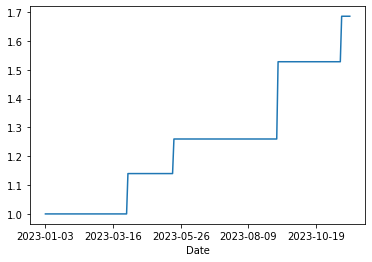

In [27]:
import matplotlib.pylab as plt
book['acc return'].plot()